# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

A: This model has 4 degrees of freedom if we fit the intercept.

**b)** Why is it bad for a model to have too many degrees of freedom?

A: If a model has too many degrees of freedom it increases the models capacity. This leads to increased model variance, allowing it to essentially memorize the training data. This hurts performance on unseen data. This is called overfitting and can lead to poor generalization.

**c)** Why is it bad for a model to have too few degrees of freedom?

A: If a model has too few degrees of freedom, it can struggle to learn non-linearities in the data distribution. For example, an OLS model with one polynomial degree $x$ plus an intercept can only fit a linear decision boundary. This would be an example of underfitting, leading to poor generalization.

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

A: The effective degrees of freedom is
$$
\mathrm{df}(\lambda) = \operatorname{tr}\left(\mathbf{X}(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^T\right) = \sum_{j=1}^p \frac{d_j^2}{d_j^2 + \lambda}
$$
where $d_j$ are the singular values of $X$.

<br>

*Reference:*
Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction* (2nd ed.). Springer. [https://link.springer.com/book/10.1007/978-0-387-84858-7](https://link.springer.com/book/10.1007/978-0-387-84858-7)

**e)** Why might we want to use Ridge regression instead of OLS?

A: We would want to use Ridge regression instead of OLS if we notice OLS start to overfit. Ridge is a way of removing variance or reducing the capacity of the model during training. Ridge regression has the potential to generalize better than OLS because of this.

**f)** Why migth we want to use OLS instead of Ridge regression?

A: If we know that the model will be used on a distribution which matches a polynomial fit, then OLS might be a better choice of model. If the dataset has little noise and there is less risk of overfitting, OLS can give a good model performance without needing to use Ridge regression.

## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

A: 

To derive the optimal parameters using ridge regression, we need to minimize the function
$$
\min_{\boldsymbol{\beta} \in \mathbb{R}^p} \frac{1}{n} \|\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2
$$

We take the derivative with respect to $\boldsymbol{\beta}$ and set it to zero.

First, expand the cost function:
$$
C(\boldsymbol{\beta}) = \frac{1}{n} [(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta})^T (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta})] + \lambda \boldsymbol{\beta}^T \boldsymbol{\beta}
$$

Take the derivative with respect to $\boldsymbol{\beta}$, using [1] 5.5 and Equation 5.108:
$$
\frac{\partial C}{\partial \boldsymbol{\beta}} = \frac{1}{n} [ -2\boldsymbol{X}^T\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta}] + 2\lambda \boldsymbol{\beta}
$$

Multiply by $n$ and set the derivative to zero. The $n$ term is also absorbed by $\lambda$:
$$
-2\boldsymbol{X}^T(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta}) + 2\lambda \boldsymbol{\beta} = 0
$$

Divide both sides by 2:
$$
-\boldsymbol{X}^T(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta}) + \lambda \boldsymbol{\beta} = 0
$$

Distribute:
$$
-\boldsymbol{X}^T\boldsymbol{y} + \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta} + \lambda \boldsymbol{\beta} = 0
$$

Bring $\boldsymbol{X}^T\boldsymbol{y}$ to the other side:
$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta} + \lambda \boldsymbol{\beta} = \boldsymbol{X}^T\boldsymbol{y}
$$

Factor out $\boldsymbol{\beta}$:
$$
\left( \boldsymbol{X}^T\boldsymbol{X} + \lambda \boldsymbol{I} \right) \boldsymbol{\beta} = \boldsymbol{X}^T\boldsymbol{y}
$$

Solve for $\boldsymbol{\beta}$:
$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left( \boldsymbol{X}^T\boldsymbol{X} + \lambda \boldsymbol{I} \right)^{-1} \boldsymbol{X}^T\boldsymbol{y}
$$

## Exercise 3 - Scaling data

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [83]:
# def polynomial_features(x, p, intercept=False):
#     n = len(x)
#     X = np.zeros((n, p + 1))
#     #X[:, 0] = ...
#     #X[:, 1] = ...
#     #X[:, 2] = ...
#     # could this be a loop?

In [84]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    if intercept:
        X = np.zeros((n, p + 1))
        for i in range(p + 1):
            X[:, i] = x**i
    else:
        X = np.zeros((n, p))
        for i in range(1, p + 1):
            X[:, i - 1] = x**i
    return X

**b)** Split your data into training and test data(80/20 split)

In [85]:
X = polynomial_features(x, 3)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [88]:
def Ridge_parameters(X, y, l):
    # Assumes X is scaled and has no intercept column
    return np.linalg.inv(X.T @ X + l * np.eye(X.shape[1])) @ X.T @ y

l = 0.01
beta = Ridge_parameters(X_train_s, y_train, l)

**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

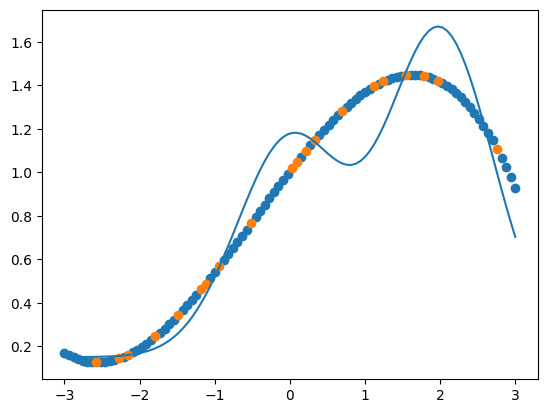

In [89]:
plt.plot(x, y)
plt.scatter(x_train, X_train_s @ beta + y_offset)
plt.scatter(x_test, X_test_s @ beta + y_offset)

## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

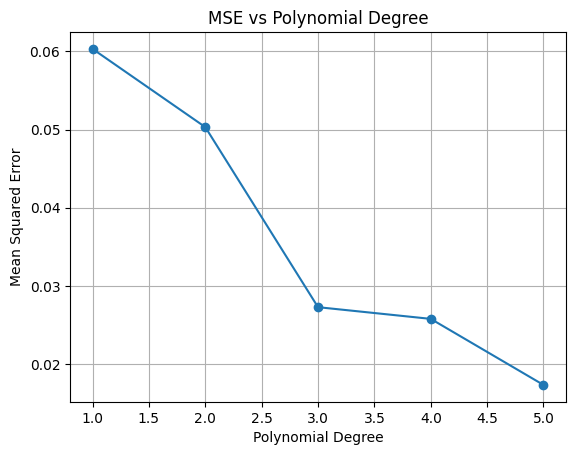

In [90]:
# a) Create polynomial features
# Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. 
# Plot the MSE as a function of polynomial degree.

from sklearn.metrics import mean_squared_error

mse_values = []
for degree in range(1, 6):
    X = polynomial_features(x, degree, intercept=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    l = 0.01
    beta = Ridge_parameters(X_train, y_train, l)

    y_pred = X_test @ beta
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# plot
import matplotlib.pyplot as plt

plt.plot(range(1, 6), mse_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.grid()
plt.show()


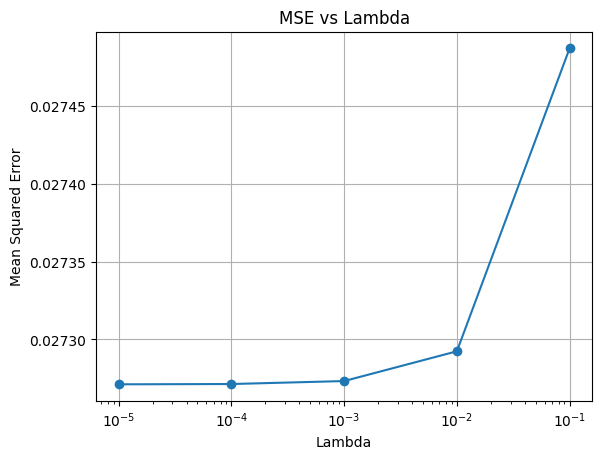

In [91]:
# b) 
# Compute the MSE of your ridge model for a polynomial with degree 3, 
# and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. 
# Plot the MSE as a function of lambda.
from sklearn.metrics import mean_squared_error

mse_values = []
lambdas = [10**-i for i in range(1, 6)]
# lambdas = range(1, 11)
X = polynomial_features(x, 3, intercept=True)

for l in lambdas:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    beta = Ridge_parameters(X_train, y_train, l)

    y_pred = X_test @ beta
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# plot
import matplotlib.pyplot as plt

plt.plot(lambdas, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Lambda')
plt.grid()
plt.show()


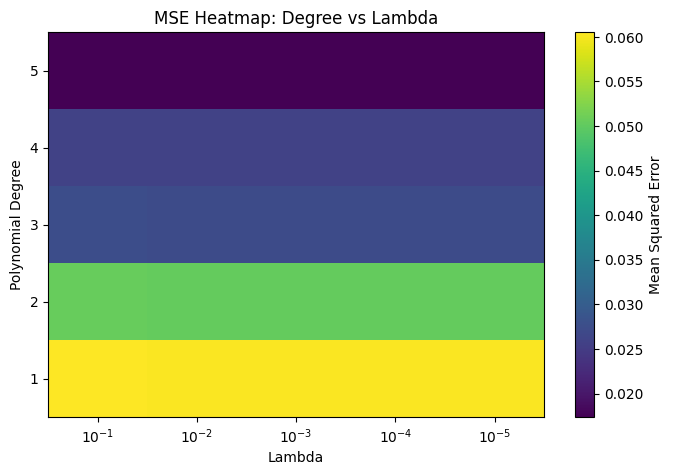

In [92]:
# c)
# Compute the MSE of your ridge model for polynomials of degrees 1 to 5, 
# and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. 
# Plot the MSE as a function of polynomial degree and lambda using a [heatmap]
# (https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

degrees = range(1, 6)
# lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale.
# Use np.logspace to generate lambdas on a logarithmic scale from 10^-1 to 10^-5
lambdas = np.logspace(-1, -5, num=5)

mse_matrix = np.zeros((len(degrees), len(lambdas)))

for i, degree in enumerate(degrees):
    X = polynomial_features(x, degree, intercept=True)
    for j, l in enumerate(lambdas):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        #print(f'lambda: {l}, degree: {degree}')
        # scaler = StandardScaler()
        # X_train_s = scaler.fit_transform(X_train)
        # X_test_s = scaler.transform(X_test)
        # y_offset = np.mean(y_train)

        beta = Ridge_parameters(X_train, y_train, l)
        y_pred = X_test @ beta

        mse = mean_squared_error(y_test, y_pred)
        mse_matrix[i, j] = mse
        #print(f'MSE: {mse}')

plt.figure(figsize=(8, 5))
im = plt.imshow(mse_matrix, aspect='auto', origin='lower', cmap='viridis')

plt.colorbar(im, label='Mean Squared Error')
plt.xlabel('Lambda')
plt.ylabel('Polynomial Degree')
plt.title('MSE Heatmap: Degree vs Lambda')

# Set ticks at the center of each cell
plt.xticks(ticks=np.arange(len(lambdas)), labels=[f'$10^{{-{i}}}$' for i in range(1, 6)])
plt.yticks(ticks=np.arange(len(degrees)), labels=[str(d) for d in degrees])
plt.show()


## References

[1] M. P. Deisenroth, A. A. Faisal, and C. S. Ong, *Mathematics for Machine Learning*. Cambridge University Press, 2020.  

[2] OpenAI, *ChatGPT*. Available: https://chat.openai.com/, 2025.

[3] Hastie et al (https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf)